In [89]:
import pandas as pd
import os

In [90]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [91]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [92]:
import zipfile

with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dogs-vs-cats")


In [93]:
import os

# List files to find the path you need
print(os.listdir("/content/"))


['.config', 'dogs-vs-cats.zip', 'dogs_vs_cats_extracted', 'dogs-vs-cats', 'Dog.jpg', 'cat.jfif', 'sample_data']


In [94]:
import zipfile
import os

zip_file_path = "dogs-vs-cats.zip"
extract_path = "dogs_vs_cats_extracted"  # Define an extraction path

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File unzipped successfully!")
print("Contents of the extracted folder:", os.listdir(extract_path))


File unzipped successfully!
Contents of the extracted folder: ['test', 'dogs_vs_cats', 'train']


In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, Activation, MaxPooling2D


In [96]:
tarin_df = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

val_df = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [97]:
def normalize(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_df_normalized = tarin_df.map(normalize)
val_df_normalized = val_df.map(normalize)

In [98]:

model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Second Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Third Convolutional Block
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Fully Connected Block
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Output Layer for Binary Classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [99]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
history = model.fit(train_df_normalized, epochs=10, validation_data=val_df_normalized)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.5719 - loss: 1.8995 - val_accuracy: 0.5408 - val_loss: 3.7035
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6737 - loss: 0.6221 - val_accuracy: 0.6584 - val_loss: 0.6259
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7410 - loss: 0.5225 - val_accuracy: 0.7408 - val_loss: 0.5187
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7848 - loss: 0.4574 - val_accuracy: 0.7392 - val_loss: 0.5396
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8228 - loss: 0.3953 - val_accuracy: 0.7170 - val_loss: 0.5743
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8408 - loss: 0.3633 - val_accuracy: 0.8030 - val_loss: 0.4416
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8848 - loss: 0.2743 - val_accuracy: 0.7406 - val_loss: 0.8007
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9233 - loss: 0.1907 - 

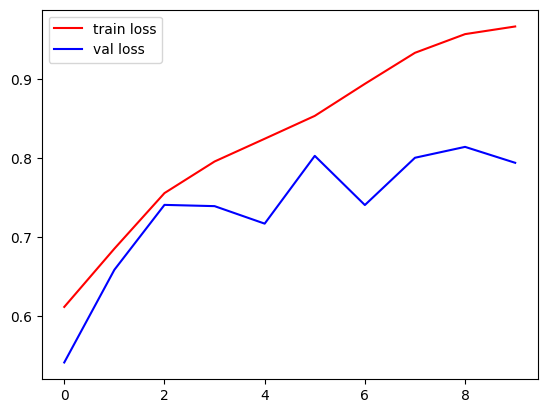

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='train loss')
plt.plot(history.history['val_accuracy'], color ='blue', label='val loss')
plt.legend()
plt.show()

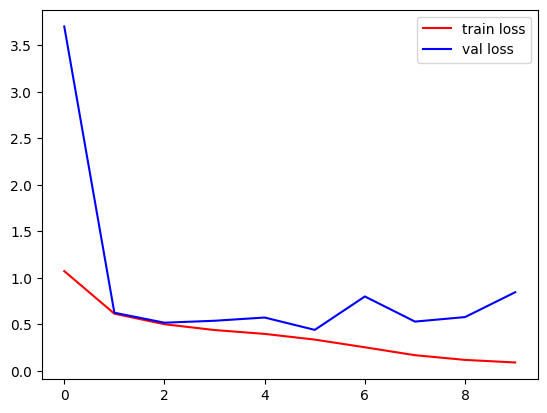

In [102]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label='train loss')
plt.plot(history.history['val_loss'], color ='blue', label='val loss')
plt.legend()
plt.show()

In [103]:
import cv2

In [104]:
img_1 = cv2.imread('Dog.jpg')
img_2 = cv2.imread('cat.jfif')

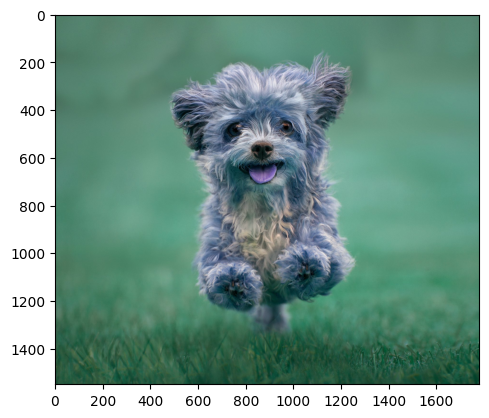

In [105]:
plt.imshow(img_1)

In [106]:
img_1.shape

(1550, 1779, 3)

In [107]:
img = cv2.resize(img_1, (256, 256))

In [108]:
test_img = img.reshape(1, 256, 256, 3)

In [109]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


array([[0.]], dtype=float32)

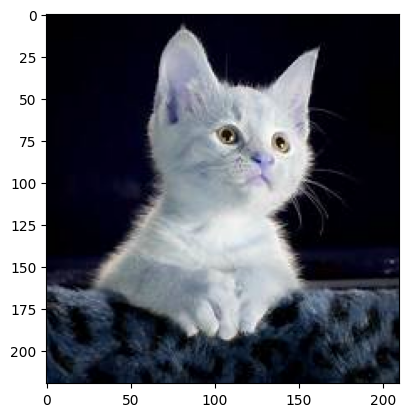

In [110]:
plt.imshow(img_2)

In [111]:
img_2.shape

(220, 210, 3)

In [112]:
img_2 = cv2.resize(img_2, (256, 256))

In [113]:
test_img_2 = img_2.reshape(1, 256, 256, 3)

In [114]:
model.predict(test_img_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.]], dtype=float32)